In [0]:
from datascience import *
import numpy as np
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
galton = Table.read_table(path_data + 'galton.csv')
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))

In [0]:
def predict_child(mpht):
    close_points = heights.where('MidParent', 
            are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean() 

In [0]:
heights_with_predictions = heights.with_column(
  'Prediction', heights.apply(predict_child, 'MidParent'))

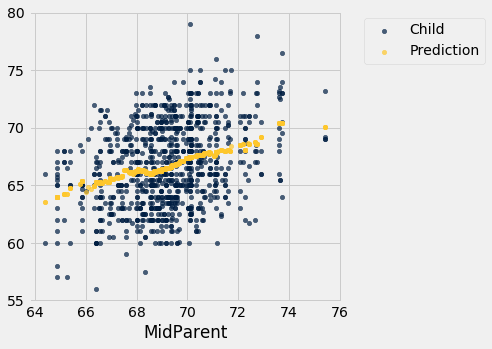

In [4]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
heights_with_predictions.scatter('MidParent')

In [0]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz) 

In [6]:
heights_SU = Table().with_columns(
    'MidParent SU', standard_units(heights.column('MidParent')),
    'Child SU', standard_units(heights.column('Child')))
heights_SU

MidParent SU,Child SU
3.45465,1.80416
3.45465,0.686005
3.45465,0.630097
3.45465,0.630097
2.47209,1.88802
2.47209,1.60848
2.47209,-0.348285
2.47209,-0.348285
1.58389,1.18917
1.58389,0.350559


In [7]:
sd_midparent = np.std(heights.column(0))
sd_midparent

1.8014050969207571

In [8]:
0.5/sd_midparent

0.277561110965367

In [0]:
def predict_child_su(mpht_su):
    close = 0.5/sd_midparent
    close_points = heights_SU.where('MidParent SU',
      are.between(mpht_su-close, mpht_su + close))
    return close_points.column('Child SU').mean()

In [0]:
heights_with_su_predictions = heights_SU.with_column(
  'Prediction SU', heights_SU.apply(predict_child_su, 'MidParent SU'))

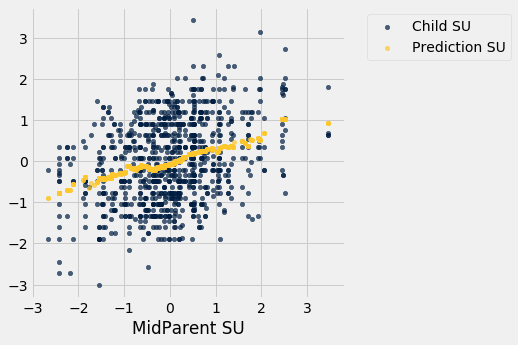

In [11]:
heights_with_su_predictions.scatter('MidParent SU')

In [12]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))\
                   *standard_units(t.column(label_y)))
    
galton_r = correlation(heights, 'MidParent', 'Child')
galton_r    

0.32094989606395924

In [0]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - \
    slope(t, label_x, label_y)*np.mean(t.column(label_x))    

In [14]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [15]:
galton_slope*70.48 + galton_intercept

67.55743656799862

In [16]:
heights_with_predictions.where('MidParent',
              are.equal_to(70.48)).show(3)

MidParent,Child,Prediction
70.48,74,67.6342
70.48,70,67.6342
70.48,68,67.6342


In [17]:
heights_with_predictions = heights_with_predictions.with_column(
   'Regression Prediction',
   galton_slope*heights.column('MidParent') + galton_intercept)
heights_with_predictions

MidParent,Child,Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


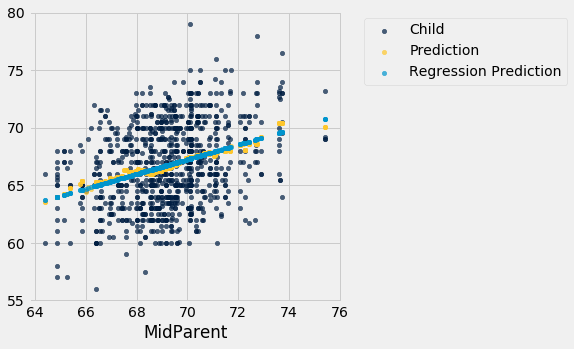

In [18]:
heights_with_predictions.scatter('MidParent')

In [0]:
def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

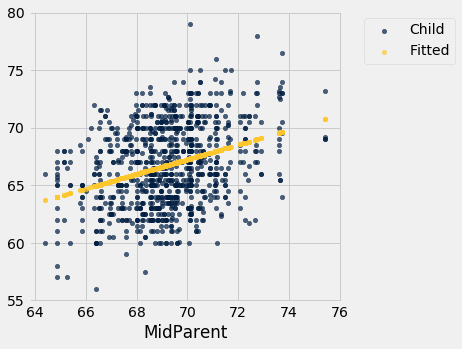

In [20]:
heights.with_column('Fitted', fit(heights,
  'MidParent', 'Child')).scatter('MidParent')